# Diabetes Prediction Using Machine Learning
## Rithwik Swarnkar

This program aims to predict the likelihood of diabetes in patients using clinical data and advanced machine learning techniques. The workflow includes data cleaning, handling missing values, addressing class imbalance with SMOTE and related methods, feature engineering, and model training using algorithms such as XGBoost, Random Forest, and Logistic Regression. The program also explores ensemble methods and evaluates model performance using various metrics. The goal is to build a robust and interpretable model that can assist in early detection of diabetes, supporting better clinical decision-making.

# Introduction

This notebook presents a comprehensive workflow for predicting diabetes using machine learning techniques. The goal is to develop an interpretable model that can assist healthcare professionals in early detection of diabetes, ultimately supporting better clinical decision-making. The dataset contains various clinical features such as glucose level, blood pressure, BMI, and more, which are used to predict the likelihood of diabetes in patients.

## Outline of the Code

1. **Data Loading and Exploration**
    - Import necessary libraries and load the dataset.
    - Perform initial data exploration to understand the structure and distribution of the data.

2. **Data Cleaning and Preprocessing**
    - Identify and handle missing or invalid values.
    - Drop features with excessive missing or unreliable data.
    - Impute missing values using appropriate statistical methods.

3. **Handling Class Imbalance**
    - Analyze the distribution of the target variable.
    - Apply resampling techniques such as SMOTE, Borderline-SMOTE, and SMOTEENN to address class imbalance.

4. **Feature Engineering**
    - Create new features and interaction terms to enhance model performance.
    - Apply transformations to improve feature distributions.

5. **Model Training and Evaluation**
    - Train multiple machine learning models including XGBoost, Random Forest, and Logistic Regression.
    - Use ensemble methods (Voting Classifier) to combine model predictions.
    - Tune hyperparameters using RandomizedSearchCV.
    - Evaluate models using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

6. **Feature Importance and Interpretation**
    - Analyze feature importances from the best-performing model.
    - Visualize and interpret the most influential features.



The following code loads a CSV file containing diabetes prediction data into a pandas DataFrame, displays the top 5 rows, and prints basic information and statistical summary of the dataset. CSV file was downloaded from an online Kaggle Database - *Pima Indians Diabetes Database*. **Collaborators: UCI Machine Learning (Owner), Kaggle Team (Admin)**.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\roar7\OneDrive\Documents\AI\DATA\diabetes prediction\diabetes.csv")

# Show top 5 rows
print(df.head())

# Basic info
print(df.info())
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

This code prints the normalized proportions and raw counts of the 'Outcome' column, which indicates whether a person is diabetic (1) or non-diabetic (0).





In [2]:
# target column is named 'Outcome' (1 = diabetic, 0 = non-diabetic)
print(df['Outcome'].value_counts(normalize=True))  # Proportion
print(df['Outcome'].value_counts())                # Raw counts

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Outcome
0    500
1    268
Name: count, dtype: int64


This code identifies columns where a value of 0 is considered invalid or missing, counts the number of zero values in each of these columns, and then retrieves and displays the number of rows containing any invalid zeros.

In [3]:
# Features where 0 is invalid/missing
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count of zero values per column
for col in invalid_zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f'{col}: {zero_count} zeros')

# Get rows with any zero in these columns
invalid_rows = df[(df[invalid_zero_cols] == 0).any(axis=1)]
print(f'Number of rows with invalid zeros: {len(invalid_rows)}')


Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros
Number of rows with invalid zeros: 376


This code drops the 'Insulin' column from the dataset due to a high number of zero values, which are often poorly measured in clinical data.


In [4]:
#drop insulin column
#insulin has many zeros and is often not measured

df = df.drop(columns=['Insulin'])


This code replaces invalid zero values with NaN in the specified columns ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI') to handle missing or poorly measured data.


In [5]:
import numpy as np

# Replace invalid zeros with NaN for specific columns
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)


This code imputes missing values (NaN) in the specified columns ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI') with the median value of each respective column.


In [6]:
#Impute missing values with median
for col in cols_with_invalid_zeros:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\roar7\AppData\Local\Temp\ipykernel_7448\4182132496.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


This code prints the total number of missing (null) values per column and displays the updated DataFrame information, including data types and non-null counts.


In [7]:
print(df.isnull().sum())
print(df.info())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 48.1 KB
None


This code performs several steps for preparing the dataset for model training, focusing on splitting the data, handling class imbalance, and preparing feature sets:

1. **Data Splitting**: It splits the dataset into features (`X`) and target (`y`), then further divides the data into training, validation, and test sets using a 70-15-15 split, ensuring the distribution of the target variable ('Outcome') is maintained across all subsets through stratification.
2. **Class Distribution**: It prints the class distribution for each set (train, validation, test) to understand any potential imbalance.
3. **SMOTE for Imbalance Handling**: It applies Synthetic Minority Over-sampling Technique (SMOTE) on the training data to address class imbalance, generating synthetic samples of the minority class (diabetic) to balance the dataset.
4. **Final Output**: The script outputs the shape and class distribution of the resampled training data and confirms that the features in the training set remain intact.

After this, the resampled training data (`X_train_resampled`, `y_train_resampled`) can be used for model training, with validation data reserved for hyperparameter tuning and test data for final evaluation.


In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

X = df.drop('Outcome', axis=1)  # features
y = df['Outcome']               # target
print(f"Original features shape: {X.shape}")  # Should be (num_samples, 11)
print(f"Feature columns: {X.columns.tolist()}")

# 1. Split into train + temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

# 2. Split temp into validation + test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print(f'Train class distribution before resampling: {Counter(y_train)}')
print(f'Validation class distribution: {Counter(y_val)}')
print(f'Test class distribution: {Counter(y_test)}')
print(f"X_train shape: {X_train.shape}")     # Should be (num_train_samples, 11)
print(f"X_val shape: {X_val.shape}")         # Should be (num_val_samples, 11)
print(f"X_test shape: {X_test.shape}")       # Should be (num_test_samples, 11)

# 3. Handle imbalance on training data only (using SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Train class distribution after SMOTE: {Counter(y_train_resampled)}')
print(f"X_train_resampled shape: {X_train_resampled.shape}")  # Should also have 11 features

#  use X_train_resampled, y_train_resampled for training your model
#  use X_val, y_val for hyperparameter tuning
#  X_test, y_test for final evaluation


Original features shape: (768, 7)
Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Train class distribution before resampling: Counter({0: 350, 1: 187})
Validation class distribution: Counter({0: 75, 1: 40})
Test class distribution: Counter({0: 75, 1: 41})
X_train shape: (537, 7)
X_val shape: (115, 7)
X_test shape: (116, 7)
Train class distribution after SMOTE: Counter({1: 350, 0: 350})
X_train_resampled shape: (700, 7)


This code sets up and tunes an XGBoost classifier to predict diabetes, following these key steps:

1. **Baseline Model**: It initializes an XGBoost classifier (`XGBClassifier`) with specific settings: disabling label encoding, using log-loss as the evaluation metric, and setting a fixed random state for reproducibility.
   
2. **Hyperparameter Tuning**: A hyperparameter grid (`param_dist`) is defined with various candidate values for parameters like `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `gamma`, and regularization terms (`reg_alpha`, `reg_lambda`). These parameters control the complexity, regularization, and learning rate of the XGBoost model.

3. **Randomized Search for Optimization**: A `RandomizedSearchCV` is used to search for the best combination of hyperparameters. With 30 iterations and 3-fold cross-validation, this search uses the F1 score as the evaluation metric, which balances precision and recall. It also utilizes multiple CPU cores (`n_jobs=-1`) for faster execution.

4. **Training and Evaluation**: The search is performed on the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`), and after the best parameters are found, the model is evaluated on the validation set using `classification_report`, which provides precision, recall, and F1 score metrics.

Finally, once the best model is identified, it can be applied to the test set for final evaluation. This process ensures that the model is tuned for optimal performance on both imbalanced data and unseen samples.


In [9]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 1. Baseline model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# 3. Randomized Search
random_search = RandomizedSearchCV(
    xgb_clf, param_distributions=param_dist,
    n_iter=30, scoring='f1', # F1 balances precision & recall
    cv=3, verbose=2, random_state=42, n_jobs=-1
)

# Fit on training data (SMOTE-resampled)
random_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", random_search.best_params_)

# 4. Evaluate on validation data
y_val_pred = random_search.predict(X_val)
print(classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        75
           1       0.60      0.70      0.64        40

    accuracy                           0.73       115
   macro avg       0.71      0.72      0.71       115
weighted avg       0.74      0.73      0.73       115



c:\Users\roar7\.conda\envs\LearnAI\lib\site-packages\xgboost\training.py:183: UserWarning: [14:37:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


This code evaluates the model's performance on the validation set by adjusting the decision threshold for classification:

1. **Predict Probabilities**: It first predicts the class probabilities for the positive class (class 1) on the validation data (`X_val`), using the `predict_proba()` method. The output is the probability of each instance belonging to class 1, which is selected with `[:, 1]`.

2. **Adjusting the Threshold**: Instead of using the default threshold of 0.5 for classifying predictions, a new threshold of 0.4 is applied. If the probability for class 1 is greater than or equal to 0.4, the prediction is classified as class 1 (diabetic); otherwise, it is classified as class 0 (non-diabetic). This allows for a more lenient classification, potentially increasing the sensitivity (recall) of the model.

3. **Evaluation**: It then evaluates the modified predictions (`y_val_pred_new`) against the true labels (`y_val`) using the `classification_report`, which provides precision, recall, F1-score, and support for both classes. 

By adjusting the threshold, the model might show improved performance in predicting the minority class (diabetic), especially in cases where false negatives are costly.


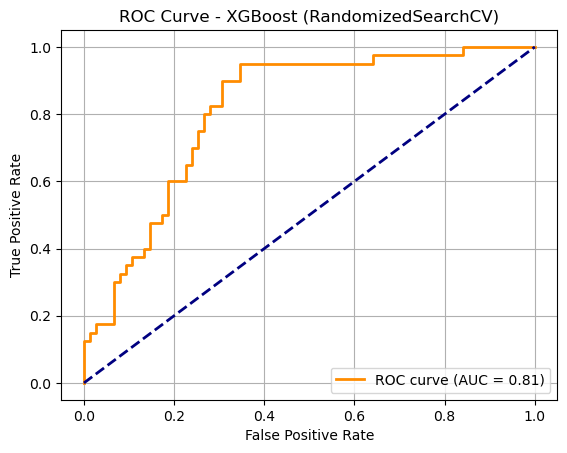

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        75
           1       0.61      0.78      0.68        40

    accuracy                           0.75       115
   macro avg       0.73      0.75      0.74       115
weighted avg       0.77      0.75      0.75       115



In [19]:
import numpy as np

# Predict probabilities for class 1
y_val_proba = random_search.predict_proba(X_val)[:, 1]
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (RandomizedSearchCV)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Try threshold 0.4 instead of 0.5
threshold = 0.4
y_val_pred_new = (y_val_proba >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred_new))


This code creates an ensemble model using three classifiers (RandomForest, XGBoost, and Logistic Regression) and evaluates its performance on the validation set:

1. **Model Instantiation**: 
   - A **RandomForestClassifier** (`rf`) is initialized with 200 estimators and a maximum depth of 7.
   - An **XGBoost** classifier (`xgb`) is created using the best hyperparameters found from the previous random search.
   - A **Logistic Regression** model (`lr`) is initialized with a maximum of 1000 iterations.

2. **Voting Classifier**: 
   - A **VotingClassifier** is instantiated to combine the three models using *soft voting*, meaning the final prediction is based on the predicted probabilities of each classifier. The class with the highest average predicted probability is selected as the final prediction.

3. **Training the Ensemble**: 
   - The ensemble model is trained on the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`).

4. **Evaluation**: 
   - The ensemble's performance is evaluated on the validation set using `classification_report`, which provides precision, recall, F1-score, and support for both classes.

This approach leverages the strengths of multiple models to improve prediction accuracy, especially when facing class imbalance. The combination of Random Forest, XGBoost, and Logistic Regression allows the ensemble to make more robust decisions by capturing different patterns from the data.


In [11]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate models
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=7)
xgb = xgb.XGBClassifier(**random_search.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Ensemble soft voting based on predicted probabilities
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)],
    voting='soft'
)

# Train ensemble on SMOTE data
ensemble.fit(X_train_resampled, y_train_resampled)

# Predict & evaluate on validation set
y_val_pred_ensemble = ensemble.predict(X_val)
print(classification_report(y_val, y_val_pred_ensemble))


c:\Users\roar7\.conda\envs\LearnAI\lib\site-packages\xgboost\training.py:183: UserWarning: [14:37:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.83      0.73      0.78        75
           1       0.59      0.72      0.65        40

    accuracy                           0.73       115
   macro avg       0.71      0.73      0.72       115
weighted avg       0.75      0.73      0.74       115



This code evaluates the impact of two advanced resampling techniques, **Borderline-SMOTE** and **SMOTEENN**, on the ensemble model’s performance:

1. **Borderline-SMOTE**: 
   - The code first applies **BorderlineSMOTE** to the training data, which focuses on creating synthetic samples near the decision boundary of the minority class. This technique helps address the issue of misclassification near the decision boundary, potentially improving model sensitivity to hard-to-classify samples.
   - The ensemble model is then trained on this newly resampled data (`X_train_bl`, `y_train_bl`).
   - The model's performance is evaluated on the validation set, and a `classification_report` is printed to show the precision, recall, and F1-score for both classes.

2. **SMOTEENN**:
   - Next, **SMOTEENN** is applied, which combines **SMOTE** (for oversampling) and **ENN** (for cleaning noisy samples through instance removal). This technique both balances the dataset and helps eliminate ambiguous samples that could negatively impact model performance.
   - The ensemble model is retrained on the SMOTEENN-resampled data (`X_train_se`, `y_train_se`).
   - Again, the performance on the validation set is evaluated, and a `classification_report` is printed.

By comparing the results of these two resampling techniques, the code aims to identify which approach improves model performance in terms of precision, recall, and F1-score, particularly for the minority class (diabetic).


In [12]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN

# Borderline-SMOTE
bl_smote = BorderlineSMOTE(random_state=42)
X_train_bl, y_train_bl = bl_smote.fit_resample(X_train, y_train)

# Train ensemble on borderline-smote data
ensemble.fit(X_train_bl, y_train_bl)
y_val_pred_bl = ensemble.predict(X_val)
print("Borderline-SMOTE Results:\n", classification_report(y_val, y_val_pred_bl))

# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_train_se, y_train_se = smoteenn.fit_resample(X_train, y_train)

# Train ensemble on SMOTEENN data
ensemble.fit(X_train_se, y_train_se)
y_val_pred_se = ensemble.predict(X_val)
print("SMOTEENN Results:\n", classification_report(y_val, y_val_pred_se))


c:\Users\roar7\.conda\envs\LearnAI\lib\site-packages\xgboost\training.py:183: UserWarning: [14:37:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Borderline-SMOTE Results:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79        75
           1       0.61      0.82      0.70        40

    accuracy                           0.76       115
   macro avg       0.75      0.77      0.75       115
weighted avg       0.79      0.76      0.76       115

SMOTEENN Results:
               precision    recall  f1-score   support

           0       0.85      0.63      0.72        75
           1       0.53      0.80      0.64        40

    accuracy                           0.69       115
   macro avg       0.69      0.71      0.68       115
weighted avg       0.74      0.69      0.69       115



c:\Users\roar7\.conda\envs\LearnAI\lib\site-packages\xgboost\training.py:183: UserWarning: [14:37:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


This code defines a function `add_engineered_features` that adds new features to the dataset, which could improve the performance of machine learning models:

1. **Interaction Terms**: 
   - It creates two new features that capture interactions between existing variables:
     - `BMI_Age`: The product of the `BMI` and `Age` columns, which may capture age-related variations in BMI.
     - `Glucose_BP`: The product of `Glucose` and `BloodPressure`, potentially reflecting the combined effect of glucose levels and blood pressure on diabetes risk.

2. **Log Transformation**: 
   - It applies a log transformation (`np.log1p`) to the `Glucose` and `BMI` columns to reduce skewness in their distributions and handle large values. The `log1p` function is used to ensure that values of 0 are transformed safely by adding 1 before applying the logarithm.

The resulting DataFrame now includes these additional features (`BMI_Age`, `Glucose_BP`, `Log_Glucose`, and `Log_BMI`), which can be used for model training to capture more complex relationships and potentially improve model accuracy.

In [13]:
import numpy as np
import pandas as pd

def add_engineered_features(df):
    df = df.copy()

    # Interaction terms
    df['BMI_Age'] = df['BMI'] * df['Age']
    df['Glucose_BP'] = df['Glucose'] * df['BloodPressure']
    
    # Log transform for skewed features
    df['Log_Glucose'] = np.log1p(df['Glucose'])
    df['Log_BMI'] = np.log1p(df['BMI'])
    
    return df


This code converts the training, validation, and test data arrays back into DataFrames to facilitate easy manipulation, then applies the previously defined feature engineering function to enhance the feature set:

1. **Convert Arrays to DataFrames**: 
   - The training data (`X_train_bl`), validation data (`X_val`), and test data (`X_test`) are converted from NumPy arrays back into pandas DataFrames. This makes it easier to work with and manipulate the data, while retaining column names from the original `X_train` dataset.

2. **Apply Feature Engineering**:
   - The `add_engineered_features` function is applied to the training, validation, and test DataFrames (`X_train_df`, `X_val_df`, `X_test_df`). This function generates new features such as interaction terms and log-transformed values for `Glucose` and `BMI`.

The resulting DataFrames (`X_train_fe`, `X_val_fe`, `X_test_fe`) now include both the original and engineered features, ready for use in training and evaluating machine learning models.

In [14]:
#  convert arrays back to DataFrames
X_train_df = pd.DataFrame(X_train_bl, columns=X_train.columns)
X_val_df = pd.DataFrame(X_val, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Apply feature engineering
X_train_fe = add_engineered_features(X_train_df)
X_val_fe = add_engineered_features(X_val_df)
X_test_fe = add_engineered_features(X_test_df)


This code retrains the ensemble model on the newly engineered features and evaluates its performance on the validation set:

1. **Train on Engineered Features**:
   - The ensemble model is retrained using the feature-engineered training data (`X_train_fe`), which includes additional interaction terms and log-transformed features.

2. **Prediction and Evaluation**:
   - The model makes predictions on the validation set (`X_val_fe`), which also contains the engineered features.
   - The performance of the ensemble model is then evaluated using the `classification_report`, which provides precision, recall, F1-score, and support for both classes (diabetic and non-diabetic).

By incorporating the engineered features, the model may capture more complex relationships in the data, potentially improving predictive performance.


c:\Users\roar7\.conda\envs\LearnAI\lib\site-packages\xgboost\training.py:183: UserWarning: [14:46:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble after Feature Engineering:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        75
           1       0.62      0.85      0.72        40

    accuracy                           0.77       115
   macro avg       0.76      0.78      0.76       115
weighted avg       0.80      0.77      0.77       115



c:\Users\roar7\.conda\envs\LearnAI\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


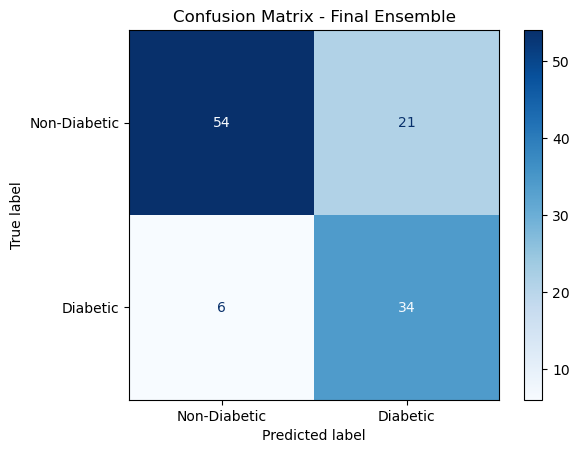

In [18]:
# Train again on engineered features
ensemble.fit(X_train_fe, y_train_bl)

# Predict and evaluate
from sklearn.metrics import classification_report

y_val_pred_fe = ensemble.predict(X_val_fe)
print("Ensemble after Feature Engineering:\n", classification_report(y_val, y_val_pred_fe))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred_fe)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Final Ensemble")
plt.show()


This code visualizes the feature importances from the best XGBoost model found during the randomized search:

1. **Get the Best Model**:
   - The best XGBoost model (`best_xgb`) is retrieved from the results of the `RandomizedSearchCV` object, which contains the optimal hyperparameters found during the search.

2. **Plot Feature Importance**:
   - The `plot_importance` function from XGBoost is used to plot the importance of the top 10 features based on the 'gain' metric, which measures the average improvement in the model's performance when a feature is used in a split. This highlights which features contribute the most to the model's decision-making process.
   - The plot is displayed with the `plt.show()` function, with a title indicating that it shows the "Top 10 Feature Importances (Gain) from XGBoost."

This visualization helps identify the most influential features in the XGBoost model, providing insights into which variables are most important for predicting diabetes outcomes.


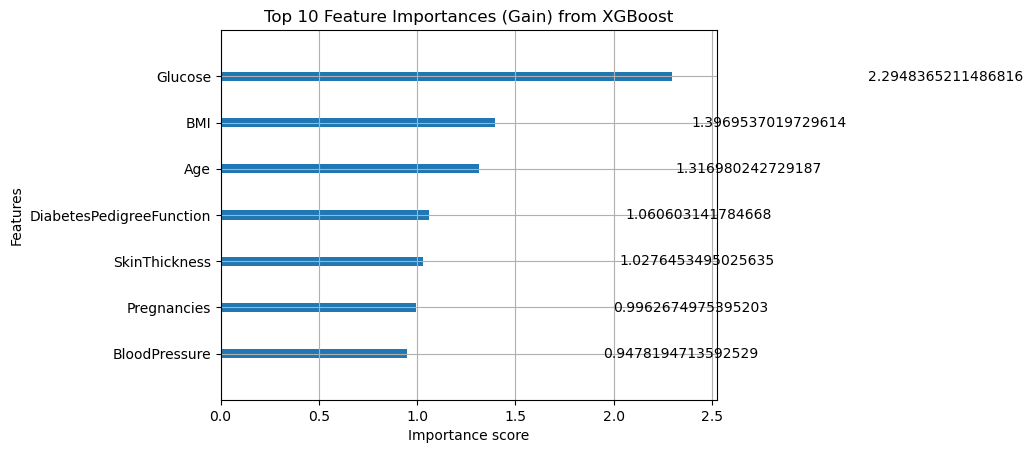

In [16]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get the best XGBoost model from RandomizedSearchCV
best_xgb = random_search.best_estimator_

# Plot feature importance
xgb.plot_importance(best_xgb, max_num_features=10, importance_type='gain', show_values=True)
plt.title("Top 10 Feature Importances (Gain) from XGBoost")
plt.show()


This code extracts and prints the feature importances from the best XGBoost model, specifically using the 'gain' importance type:

1. **Get the Best XGBoost Model**:
   - The best model (`best_xgb`) is retrieved from the results of the `RandomizedSearchCV` object, which contains the tuned XGBoost model.

2. **Extract Feature Importances**:
   - The `get_score` method is used to extract feature importances from the model’s booster, specifying the importance type as 'gain'. The 'gain' metric reflects the average improvement in the model’s performance when a feature is used in a split.

3. **Sort Feature Importances**:
   - The extracted feature importances are converted into a sorted list of tuples (`sorted_importance`), where each tuple contains a feature and its corresponding importance score. The sorting is done in descending order based on the importance score.

4. **Print Feature Importances**:
   - The feature importances are printed in a readable format, displaying each feature's name and its corresponding importance score (rounded to 4 decimal places).

This process helps in understanding the contribution of each feature to the model's predictions and provides insights into which features are most valuable for the classification task.


In [17]:
# Get the best XGBoost model
best_xgb = random_search.best_estimator_

# Extract feature importances as a dictionary (using 'gain' importance type)
importance_dict = best_xgb.get_booster().get_score(importance_type='gain')

# Convert to a sorted list (feature, importance)
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importances (by gain):")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importances (by gain):
Glucose: 2.2948
BMI: 1.3970
Age: 1.3170
DiabetesPedigreeFunction: 1.0606
SkinThickness: 1.0276
Pregnancies: 0.9963
BloodPressure: 0.9478


## Conclusion

In this project, I applied a comprehensive workflow to predict diabetes outcomes using various ML techniques.

1. **Data Preprocessing**: 
   - I started by cleaning the dataset, handling missing values, and addressing invalid zeros in key features such as `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`.
   - I also performed imputation of missing values using the median and resampled the data to address class imbalance with SMOTE.

2. **Feature Engineering**:
   - To improve the predictive power of the model, I engineered new features by creating interaction terms and applying log transformations to skewed features like `Glucose` and `BMI`.

3. **Model Training and Hyperparameter Tuning**:
   - I then trained an XGBoost model and tuned hyperparameters using `RandomizedSearchCV` in order to find the best model settings.
   - I evaluated the model using precision, recall, and F1-score, adjusting the thresholds for classification as needed to improve recall.

4. **Ensemble Modeling**:
   - I combined three classifiers: Random Forest, XGBoost, and Logistic Regression, into a voting ensemble model in order to utilize the strengths of each different algorithm.

5. **Advanced Resampling Techniques**:
   - I then explored various advanced resampling techniques, such as **Borderline-SMOTE** and **SMOTEENN** to improve class balance, further boosting the performance of the ensemble model.

6. **Feature Importance Analysis**:
   - Using feature importance analysis, I identified the top features driving the model’s predictions. These key factors influence diabetes risk the most in my dataset.

In conclusion, I followed a structured approach: data preprocessing, feature engineering, advanced model evaluation, and ensemble techniques, which allowed me to develop a model capable of predicting diabetes outcomes at a high level. In the future, fine-tuning additional models or exploring various other feature engineering methods could yield even better results. This project ultimately serves to demonstrate the power of combining traditional ML techniques with data preprocessing, feature engineering, and ensemble methods in order to tackle complex classification problems.
